# Illustration of how we soften the Flooding threshold

In [1]:
# External modules.
from matplotlib import colormaps
from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
import numpy as np
import os

# Internal modules.
from setup.directories import img_path
import setup.sunhuber as sunhuber
from setup.utils import makedir_safe
from setup.results import my_ext

In [2]:
# Create directory to save figures.
makedir_safe(img_path)

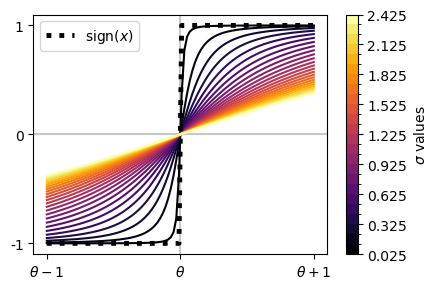

In [3]:
# Main content.

sigmas = np.arange(0.025, 2.5+0.025, 0.1)

cmap = colormaps.get_cmap("inferno")
colours = cmap(np.linspace(0.0, 1.0, len(sigmas)))
#colours = []
#for i in range(len(sigmas)):
#   colours += [cmap(i/len(sigmas))]
x = np.linspace(-1.0, 1.0, 100)
fig, ax = plt.subplots(1, 1, figsize=(4.5,3))
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
for i, sigma in enumerate(sigmas):
    ax.plot(x, sunhuber.rho_d1(x=(x/sigma)), color=colours[i], linestyle="solid")
ax.plot(x, np.sign(x), color="xkcd:black", linestyle="dotted", linewidth=3.5, label=r"sign$(x)$")
ax.set_yticks([-1.0, 0.0, 1.0])
ax.set_yticklabels([r"-1", r"0", r"1"])
ax.set_xticks([-1.0, 0.0, 1.0])
ax.set_xticklabels([r"$\theta-$"+str(1),
                    r"$\theta$",
                    r"$\theta+$"+str(1)])
ax.legend(loc="upper left")
norm = BoundaryNorm(sigmas, cmap.N)
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax)
cb.set_label(label=r"$\sigma$ values")
plt.tight_layout()
fname = os.path.join(img_path, "rho_smoothed.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

___